<h1>Diyor Umurzakov, AIN-1-21</h1>

<h1>Лабораторная работа 5</h1>
<h2>Изучение моделей классификации и регрессии</h2>

<h2>Данные диабета</h2>

In [2]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print("Форма массива data: {}".format(diabetes_dataset.data.shape))

Форма массива data: (442, 10)


In [3]:
print("Ключи diabetes: \n{}".format(diabetes_dataset.keys()))

Ключи diabetes: 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
print(diabetes_dataset["DESCR"] [:1500] + '\n....')

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
print("Названия признаков: {}".format(diabetes_dataset['feature_names']))

Названия признаков: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<h4>KNeighborsRegressor метод</h4>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X = diabetes_dataset.data[:, 0:100000] 
y = diabetes_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 126.333333

In [8]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test,y_test)))

R^2 на тестовом наборе: 0.15


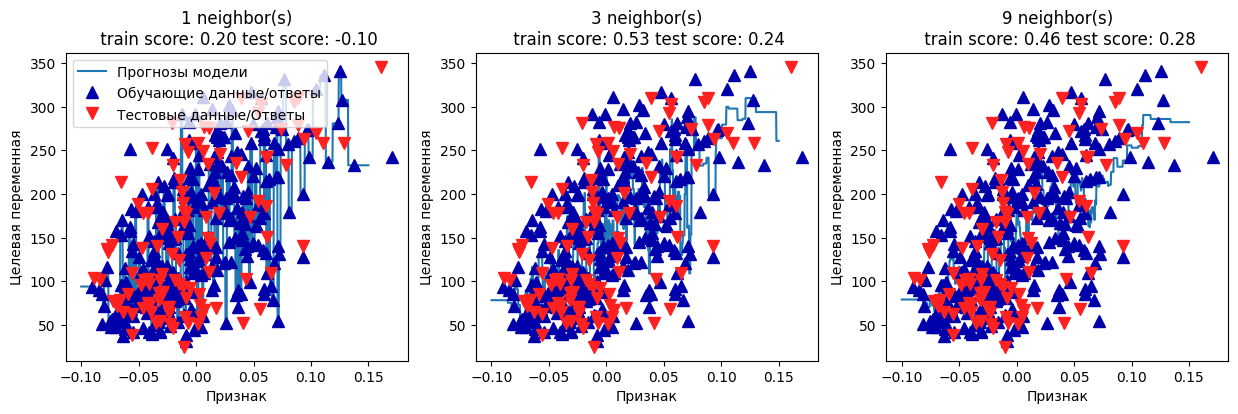

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes_dataset.data[:, 2:3], diabetes_dataset.target, random_state=66)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-0.1, 0.15, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test))
    )
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")

axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы", "Тестовые данные/Ответы"], loc="best")

plt.show()

<h4>Линейные модели регрессии</h4>

In [10]:
from sklearn.linear_model import LinearRegression

X = diabetes_dataset.data[:, 0:100000]  
y = diabetes_dataset.target

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef :{}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef :[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
lr.intercept_: 151.6651755919933


In [11]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.48


<h4>Гребневая регрессия</h4>

In [12]:
from sklearn.linear_model import Ridge
X = diabetes_dataset.data  
y = diabetes_dataset.target

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.46
Правильность на тестовом наборе: 0.36


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.17
Правильность на тестовом наборе: 0.14


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.37


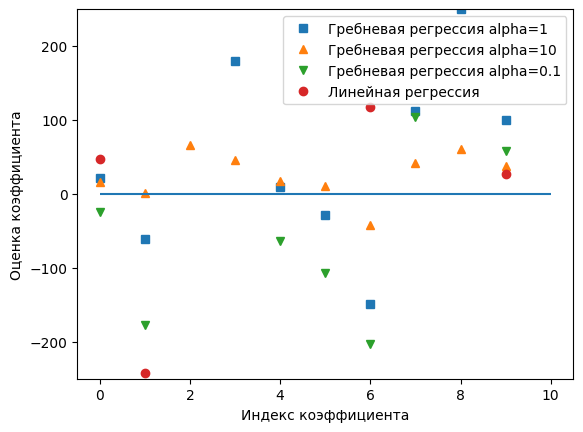

In [15]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-250, 250)
plt.legend()
plt.show()

<h4>Лассо</h4>

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.41
Правильность на тестовом наборе: 0.28
Количество использованных признаков: 2.00


In [17]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.35
Количество использованных признаков: 9.00


In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.56
Правильность на тестовом наборе: 0.36
Количество использованных признаков: 10.00


Text(0, 0.5, 'Оценка коэффициента')

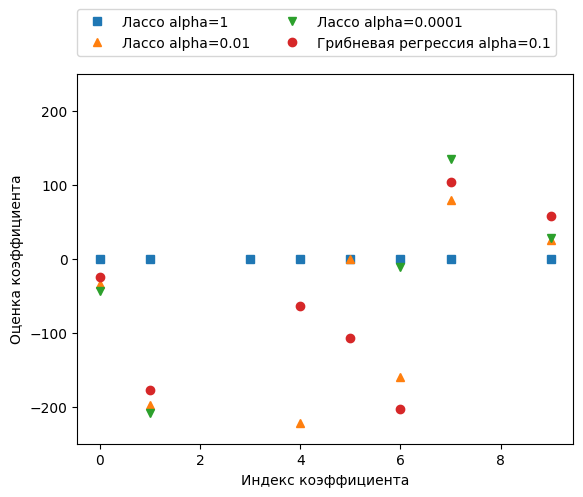

In [19]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Грибневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-250, 250)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

<h4>Построение модели LogisticRegression</h4>

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.033
Правильность на тестовом наборе: 0.009


In [21]:
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.178
Правильность на тестовом наборе: 0.009


In [22]:
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.030
Правильность на тестовом наборе: 0.009


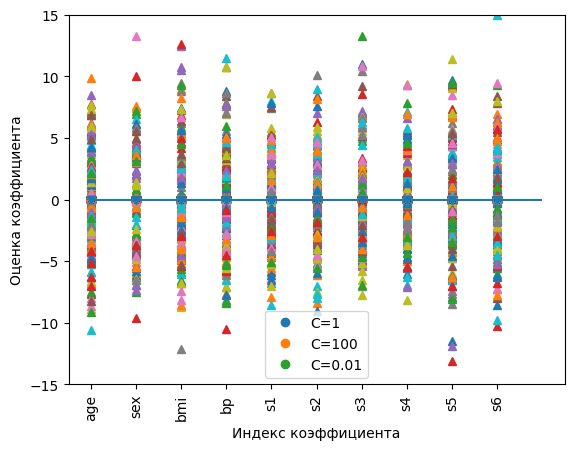

In [23]:
plt.plot(logreg.coef_.T, 'o')
plt.plot(logreg100.coef_.T, '^')
plt.plot(logreg001.coef_.T, 'v')
plt.xticks(np.arange(diabetes_dataset.data.shape[1]), diabetes_dataset.feature_names, rotation=90)
plt.hlines(0, 0, diabetes_dataset.data.shape[1])
plt.ylim(-15, 15)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend(['C=1', 'C=100', 'C=0.01'])
plt.show()

<h3>Выводы по датасету diabetes</h3>
<h3>Линейная регрессия:
Модель Линейной регрессии показала правильность на обучающем наборе равную 0.52 и на тестовом наборе - 0.48. Это значит, что производительность модели средняя. Возможно при выборе другой модели результаты могут улучшиться.</h3>

<h3>Ridge:
Модель Ridge регрессии показала правильность на обучающем наборе равную 0.55 и на тестовом наборе - 0.37. Значения на тестовом наборе показывают плохой результат. Стоит рассмотреть другие модели.</h3>

<h3>Модель Lasso регрессии дала оценку на обучающем наборе 0.56 и на тестовом наборе 0.36. Это может свидетельствовать о некотором переобучении модели, что приводит к плохой обобщающей способности на тестовых данных.</h3>

<h3>Модель логистической регрессии, обученная на данных, демонстрирует крайне низкую правильность (0.033, 0.09) на обучающем и тестовом наборах. Такие значения могут свидетельствовать о том, что модель неспособна эффективно обобщаться на новые данные и склонна к переобучению.</h3>

<h2>Данные linnerud физических упражнений</h2>

In [24]:
from sklearn.datasets import load_linnerud
linnerud_dataset = load_linnerud()
print("Форма массива data: {}".format(linnerud_dataset.data.shape))

Форма массива data: (20, 3)


In [25]:
print("Ключи linnerud: {}".format(linnerud_dataset.keys()))

Ключи linnerud: dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [26]:
print(linnerud_dataset["DESCR"] [:1500] + '/n....')

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|/n....


In [27]:
print("Названия признаков: {}".format(linnerud_dataset['feature_names']))

Названия признаков: ['Chins', 'Situps', 'Jumps']


<h4>Линейная модель регрессии</h4>

In [28]:
lrr = LinearRegression().fit(X_train, y_train)

print("lr.coef: {}".format(lrr.coef_))
print("lr.intercept_: {}".format(lrr.intercept_))

lr.coef: [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
lr.intercept_: 153.06786205925664


In [29]:
print("Правильность на обучающем наборе: {:.2f}".format(lrr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lrr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.56
Правильность на тестовом наборе: 0.36


<h4>Гребневая регрессия</h4>

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)

print("Правильность на обучающем наборе: {}".format(ridge.score(X_train,y_train)))
print("Правильность на тестовом наборе: {}".format(ridge.score(X_test,y_test)))

Правильность на обучающем наборе: 0.4625420370188341
Правильность на тестовом наборе: 0.3569596077458861


In [31]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Правильность на обучающем наборе: {}".format(ridge10.score(X_train,y_train)))
print("Правильность на тестовом наборе: {}".format(ridge10.score(X_test,y_test)))

Правильность на обучающем наборе: 0.17131356091679695
Правильность на тестовом наборе: 0.14333099992172604


In [32]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Правильность на обучающем наборе: {}".format(ridge01.score(X_train,y_train)))
print("Правильность на тестовом наборе: {}".format(ridge01.score(X_test,y_test)))

Правильность на обучающем наборе: 0.5502014591285381
Правильность на тестовом наборе: 0.3690250543749981


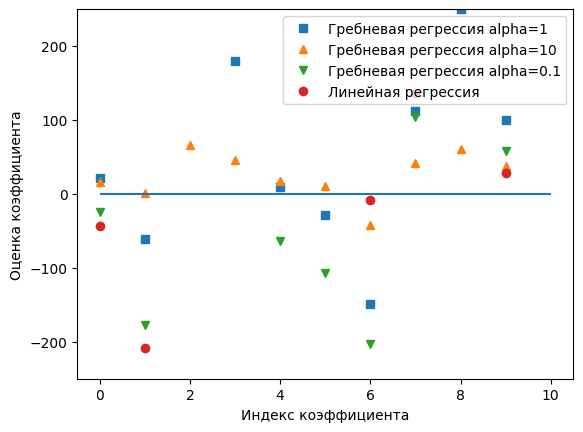

In [33]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lrr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lrr.coef_))
plt.ylim(-250, 250)
plt.legend()
plt.show()

<h4>Лассо</h4>

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.41
Правильность на тестовом наборе: 0.28
Количество использованных признаков: 2.00


In [35]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.35
Количество использованных признаков: 9.00


In [36]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.56
Правильность на тестовом наборе: 0.36
Количество использованных признаков: 10.00


Text(0, 0.5, 'Оценка коэффициента')

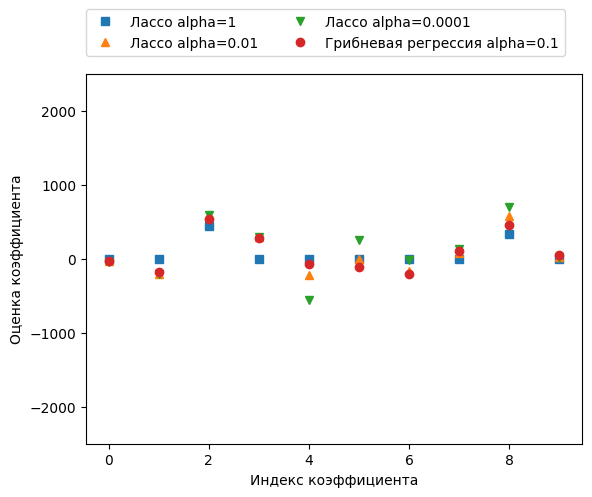

In [37]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Грибневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-2500, 2500)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [38]:
X = linnerud_dataset.data  
y = linnerud_dataset.target
y_1d = y[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y_1d, test_size=0.2, random_state=42)
y_1d

array([36., 37., 38., 35., 35., 36., 38., 34., 31., 33., 34., 33., 34.,
       46., 36., 37., 37., 32., 33., 33.])

<h4>Построение модели LogisticRegression</h4>

In [39]:
logreg = LogisticRegression().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.375
Правильность на тестовом наборе: 0.000


/media/diyor/Диск/BigData/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.438
Правильность на тестовом наборе: 0.000


/media/diyor/Диск/BigData/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.562
Правильность на тестовом наборе: 0.000


/media/diyor/Диск/BigData/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


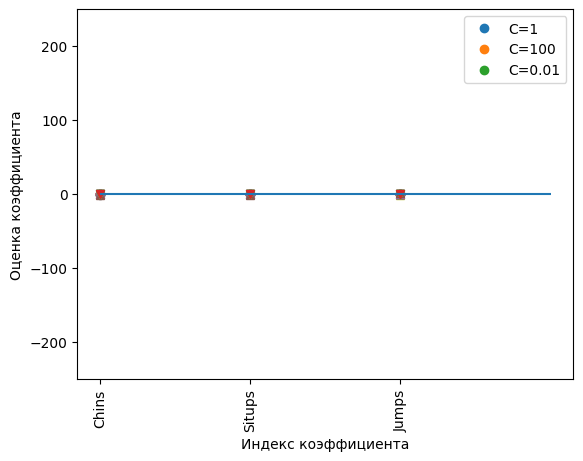

In [42]:
plt.plot(logreg.coef_.T, 'o')
plt.plot(logreg100.coef_.T, '^')
plt.plot(logreg001.coef_.T, 'v')
plt.xticks(np.arange(linnerud_dataset.data.shape[1]), linnerud_dataset.feature_names, rotation=90)
plt.hlines(0, 0, linnerud_dataset.data.shape[1])
plt.ylim(-250, 250)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend(['C=1', 'C=100', 'C=0.01'])
plt.show()

<h3>Выводы по датасету linnerud</h3>

<h3>Линейная регрессия:
Модель обученная с использованием метода линейной регрессии демонстрирует относительно высокую правильность на обучающем наборе (0.56), но существенно более низкую правильность на тестовом наборе (0.36). Это может свидетельствовать о переобучении модели, когда она хорошо подстраивается под обучающие данные, но не обобщается эффективно на новые данные.</h3>

<h3>Ridge:
Модель, построенная с использованием метода Ridge Regression (гребневая регрессия), демонстрирует относительно среднюю правильность как на обучающем, так и на тестовом наборах (0.46, 0.35). Важно отметить, что результаты на тестовом наборе не сильно отличаются от результатов на обучающем, что может свидетельствовать о том, что модель хорошо обобщается на новые данные.</h3>

<h3>Модель Lasso с параметром регуляризации 0.0001 демонстрирует относительно высокую правильность на обучающем наборе (0.56), но существенно более низкую правильность на тестовом наборе (0.36). Это может свидетельствовать о переобучении модели, но при этом модель использует все 10 признаков, что может быть полезным в некоторых сценариях.</h3>

<h3>Модель логистической регрессии с параметром регуляризации C=0.01 демонстрирует относительно высокую правильность на обучающем наборе (0.562), но крайне низкую правильность на тестовом наборе (0.000). Это может свидетельствовать о том, что модель может быть настроена слишком под обучающий набор и не обобщается хорошо на новые данные.</h3>